# TA-Lib简介

TA-Lib，全称“Technical Analysis Library”, 即技术分析库，是Python金融量化的高级库，涵盖了150多种股票期货交易软件中常用的技术指标，如MACD、RSI、KDJ、动量指标、布林带等等。

# TA-Lib安装

在cmd上使用“pip install talib”命令一般会报错，正确安装方法是，进入[https://www.lfd.uci.edu/~gohlke/pythonlibs/](https://www.lfd.uci.edu/~gohlke/pythonlibs)
，下拉选择TA_Lib-0.4.17-cp37-cp37m-win_amd64.whl（win系统64位，python3.7版本，根据自己系统和python版本选择相应的安装包），将下载包放在当前工作路径中，然后在Anaconda Prompt（或windows的cmd）里面输入命令：pip install TA_Lib-0.4.17-cp27-cp27m-win_amd64.whl。

# TA-Lib使用

In [1]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   

#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [2]:
#引入TA-Lib库
import talib as ta

In [3]:
#查看包含的技术指标和数学运算函数
#print(ta.get_functions())
#print(ta.get_function_groups())

In [3]:
ta_fun=ta.get_function_groups()
ta_fun.keys()

dict_keys(['Cycle Indicators', 'Math Operators', 'Math Transform', 'Momentum Indicators', 'Overlap Studies', 'Pattern Recognition', 'Price Transform', 'Statistic Functions', 'Volatility Indicators', 'Volume Indicators'])

In [79]:
import tushare as ts
df=ts.get_k_data('sh',start='2000-01-01')
df.index=pd.to_datetime(df.date)
df=df.sort_index()
df.head()

,date,open,close,high,low,volume,code
date,,,,,,,
2000-01-04,2000-01-04,1368.69,1406.37,1407.52,1361.21,9034020.0,sh
2000-01-05,2000-01-05,1407.83,1409.68,1433.78,1398.32,10580000.0,sh
2000-01-06,2000-01-06,1406.04,1463.94,1463.95,1400.25,13480500.0,sh
2000-01-07,2000-01-07,1477.15,1516.60,1522.82,1477.15,34515700.0,sh
2000-01-10,2000-01-10,1531.71,1545.11,1546.72,1506.40,31253500.0,sh


In [28]:
types=['SMA','EMA','WMA','DEMA','TEMA','TRIMA','KAMA','MAMA','T3']
df_ma=pd.DataFrame(df.close)
for i in range(len(types)):
    df_ma[types[i]]=ta.MA(df.close,timeperiod=5,matype=i)
df_ma.tail()

,close,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,MAMA,T3
trade_date,,,,,,,,,,
2019-02-15,2682.3850,2689.78858,2682.255710,2696.774193,2706.196706,2705.003141,2698.074789,2683.362662,2675.123132,2683.026168
2019-02-18,2754.3566,2709.88070,2706.289340,2718.296867,2738.272424,2742.838106,2710.250733,2694.989699,2679.084805,2701.797937
2019-02-19,2755.6459,2726.63114,2722.741527,2733.551933,2755.031707,2758.280226,2719.109133,2703.634680,2682.912860,2720.486161
2019-02-20,2761.2189,2734.66126,2735.567318,2745.081187,2765.644632,2766.335067,2735.561156,2707.840198,2686.828162,2737.502329
2019-02-21,2751.8012,2741.08152,2740.978612,2750.794500,2764.637684,2760.819146,2748.030544,2709.938169,2690.076814,2750.169381


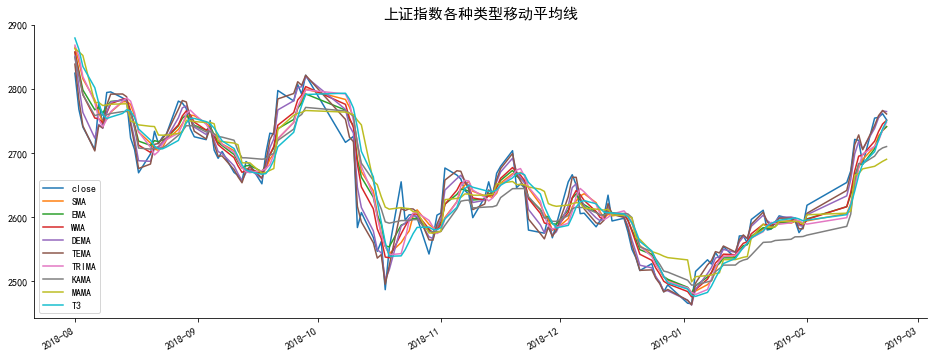

In [73]:
df_ma.loc['2018-08-01':].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数各种类型移动平均线',fontsize=15)
plt.xlabel('')
plt.show()

In [32]:
#画5、30、120、250指数移动平均线
N=[5,30,120,250]
for i in N:
    df['ma_'+str(i)]=ta.EMA(df.close,timeperiod=i)
df.tail()

,close,open,high,low,pct_chg,vol,ma_5,ma_30,ma_120,ma_250
trade_date,,,,,,,,,,
2019-02-15,2682.3850,2712.7862,2715.6321,2679.7849,-1.3720,196004265.0,2682.255710,2607.557548,2662.930957,2808.867745
2019-02-18,2754.3566,2699.8171,2754.3566,2699.8171,2.6831,260436007.0,2706.289340,2617.028455,2664.442124,2808.433393
2019-02-19,2755.6459,2759.4960,2780.7837,2737.5864,0.0468,288046271.0,2722.741527,2625.971516,2665.949625,2808.012776
2019-02-20,2761.2189,2761.0588,2767.4109,2739.9783,0.2022,245972527.0,2735.567318,2634.697153,2667.524324,2807.639916
2019-02-21,2751.8012,2759.9383,2794.0131,2744.9762,-0.3411,298649969.0,2740.978612,2642.252253,2668.917330,2807.194986


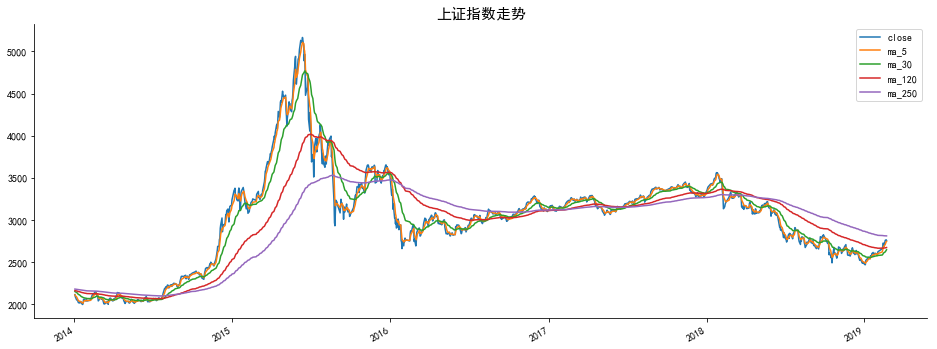

In [35]:
df.loc['2014-01-01':,['close','ma_5','ma_30','ma_120','ma_250']].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数走势',fontsize=15)
plt.xlabel('')
plt.show()

### BBANDS布林带指标

利用统计原理，求出股价的标准差及其信赖区间，从而确定股价的波动范围及未来走势，利用波带显示股价的安全高低价位。

In [44]:
H_line,M_line,L_line=ta.BBANDS(df.close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
df1=pd.DataFrame(df.close,index=df.index,columns=['close'])
df1['H_line']=H_line
df1['M_line']=M_line
df1['L_line']=L_line
df1.tail()

,close,H_line,M_line,L_line
trade_date,,,,
2019-02-15,2682.3850,2711.977963,2610.768145,2509.558327
2019-02-18,2754.3566,2734.675802,2621.697710,2508.719618
2019-02-19,2755.6459,2755.388183,2630.962760,2506.537337
2019-02-20,2761.2189,2773.836578,2640.502600,2507.168622
2019-02-21,2751.8012,2786.413068,2650.110810,2513.808552


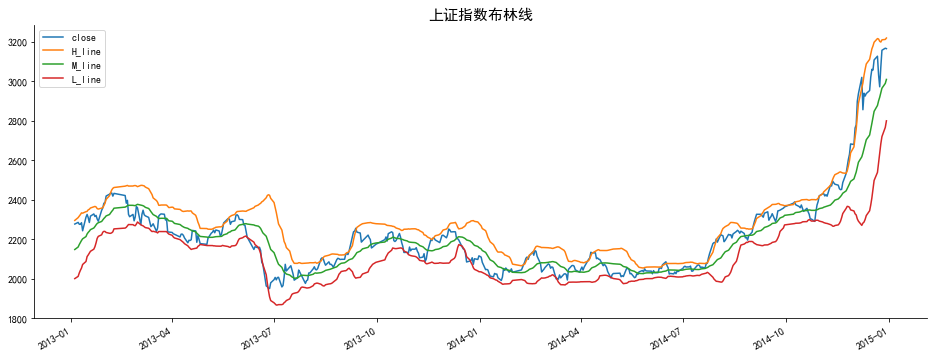

In [45]:
df1.loc['2013-01-01':'2014-12-30'].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数布林线',fontsize=15)
plt.xlabel('')
plt.show()

In [64]:
df2=pd.DataFrame(df.close)
df2['HT']=ta.HT_TRENDLINE(df.close)
periods =np.array([3]*len(df), dtype=float)
df2['MAVP']=ta. MAVP(df.close,periods)
df2['MIDPOINT']=ta.MIDPOINT(df.close)
df2['MIDPRICE']=ta.MIDPRICE(df.high,df.low)
df2['SAR']=ta.SAR(df.high,df.low)
df2['SAREXT']=ta.SAREXT(df.high,df.low)
df2.tail()

,close,HT,MAVP,MIDPOINT,MIDPRICE,SAR,SAREXT
trade_date,,,,,,,
2019-02-15,2682.3850,2575.975678,2707.717733,2648.32195,2644.71850,2642.711689,2642.711689
2019-02-18,2754.3566,2583.266927,2718.813833,2664.96610,2657.16930,2660.060351,2660.060351
2019-02-19,2755.6459,2593.404944,2730.795833,2665.61075,2670.38285,2678.919601,2678.919601
2019-02-20,2761.2189,2601.866953,2757.073800,2668.39725,2670.38285,2699.292421,2699.292421
2019-02-21,2751.8012,2610.311615,2756.222000,2668.39725,2676.99755,2715.590677,2715.590677


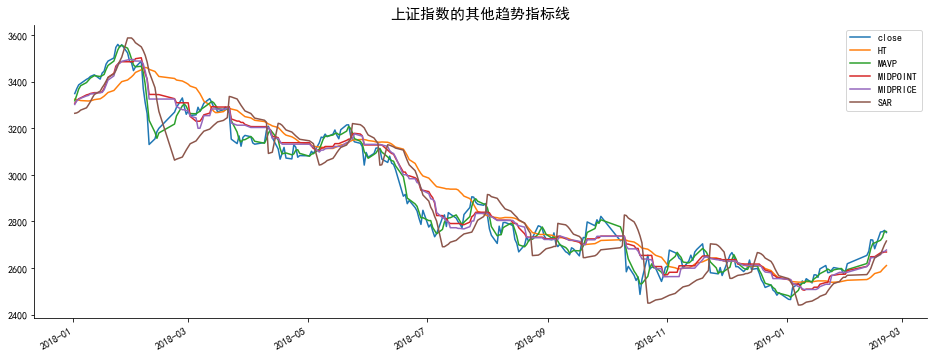

In [72]:
df2.loc['2018-01-01':'2019-02-21',['close','HT','MAVP','MIDPOINT','MIDPRICE','SAR']].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数的其他趋势指标线',fontsize=15)
plt.xlabel('')
plt.show()

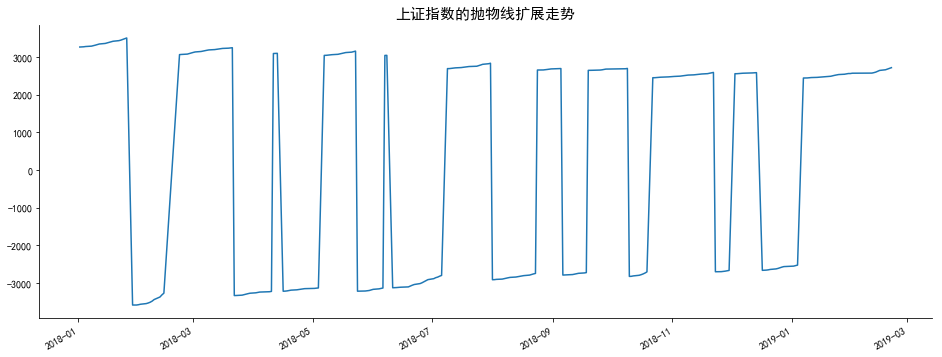

In [71]:
df2.loc['2018-01-01':'2019-02-21','SAREXT'].plot(figsize=(16,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数的抛物线扩展走势',fontsize=15)
plt.xlabel('')
plt.show()